###### Guilherme Teixeira Batista Engenharia De Computação 2A

# Introdução

### Na matéria de Ciência dos Dados, nos foi proposto formular uma pergunta, relacionando 2 variáveis ao IDH.

### Com isso, chegamos a seguinte indagação:

# É verdade que quanto mais desenvolvido for um país, maior será o seu consumo de energia e emissão de co2 por pessoa?

# Análises e explicação dos resultados 

## 2001

Importando as bibliotecas // Comandos: ``inline``;``import``

In [189]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
matplotlib.style.use('ggplot')
sns.set(style="ticks")

Lendo Arquivos // Comandos: ``read_csv``

In [190]:
energia = pd.read_csv('energy_use_per_person.csv')
co2 = pd.read_csv('co2_emissions_tonnes_per_person.csv')
idh = pd.read_csv('hdi_human_development_index.csv')

Renomeando e reindexando os países // Comandos: ``rename``;``set_index``

In [191]:
energia = energia.rename(columns={'geo': 'Países'})
energia = energia.set_index('Países')

co2 = co2.rename(columns={'geo': 'Países'})
co2 = co2.set_index('Países')

idh = idh.rename(columns={'geo': 'Países'})
idh = idh.set_index('Países')

## Por se tratarem de variáveis que mudam rapidamente ao longo do tempo, elas serão analisadas em dois anos diferentes.

## 2001

Travando as variáveis na coluna e linhas desejadas // Comandos: ``loc``

In [192]:
energia_loc_2001 = energia.loc[:, ['2001']]
co2_loc_2001 = co2.loc[:, ['2001']]
idh_loc_2001 = idh.loc[:, ['2001']]

Juntando Colunas // Comandos: ``join``

In [193]:
join_1_2001 = idh_loc_2001.join(energia_loc_2001, how="inner", lsuffix="_IDH", rsuffix="_ENERGIA")
join_2_2001 = join_1_2001.join(co2_loc_2001, how="inner")

Renomeando Coluna 2001 (CO2) // Comandos: ``rename``

In [194]:
relacao_idh = join_2_2001.rename(columns={'2001': '2001_CO2'})
relacao_idh

,2001_IDH,2001_ENERGIA,2001_CO2
Países,,,
Albania,0.670,597.0,1.0300
Algeria,0.653,856.0,2.6700
Angola,0.401,442.0,0.5730
Antigua and Barbuda,NaN,NaN,4.1000
Argentina,0.776,1560.0,3.5700
Armenia,0.645,657.0,1.1600
Australia,0.902,5450.0,16.9000
Austria,0.847,3760.0,8.1400
Azerbaijan,0.651,1410.0,3.5100


Analisando a correlação entre as 3 variáveis // Comandos: ``loc; corr``

In [195]:
relacao_idh.loc[:,["2001_CO2", "2001_IDH"]].corr()

,2001_CO2,2001_IDH
2001_CO2,1.000000,0.544848
2001_IDH,0.544848,1.000000


In [196]:
relacao_idh.loc[:,["2001_ENERGIA", "2001_IDH"]].corr()

,2001_ENERGIA,2001_IDH
2001_ENERGIA,1.000000,0.611416
2001_IDH,0.611416,1.000000


In [197]:
relacao_idh.loc[:,["2001_ENERGIA", "2001_CO2"]].corr()

,2001_ENERGIA,2001_CO2
2001_ENERGIA,1.000000,0.929859
2001_CO2,0.929859,1.000000


Utilizando Função para fazer gráfico de dispersão, coeficientes da reta de ajuste, reta de ajuste, coeficientes de ajuste

In [198]:
def dispersao_com_reta(dados, variavel_x, variavel_y):
    dados_X = dados[variavel_x]
    dados_Y = dados[variavel_y]
    
    # Calcula os coeficientes da reta de ajuste.
    cov = dados_X.cov(dados_Y)

    var_X = dados_X.var()
    var_Y = dados_Y.var()

    mX = dados_X.mean()
    mY = dados_Y.mean()
    
    a = cov / var_X
    b = mY - a*mX

    # Desenha o gráfico de dispersão e a reta de ajuste.
    min_X = dados_X.min()
    max_X = dados_X.max()

#     plt.scatter(dados_X, dados_Y)  # dados.plot.scatter(x=variavel_X, y=variavel_Y) tambem serve!
    dados.plot.scatter(x=variavel_x, y=variavel_y)
    plt.plot((min_X, max_X), (a*min_X + b, a*max_X + b), color='red')

    plt.title('{0} versus {1}'.format(variavel_x, variavel_y))
    plt.xlabel('{0} (log)' .format(variavel_x))
    plt.ylabel(variavel_y)
    
    # Retorna os coeficientes de ajuste da reta.
    return a, b

Analisando Gráficamente as 3 variáveis

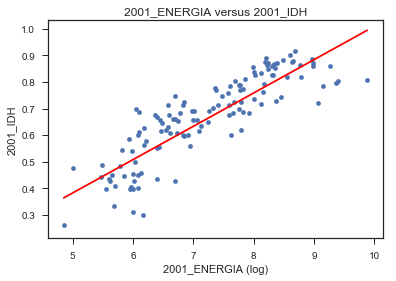

In [199]:
relacao_idh["2001_ENERGIA"] = np.log(relacao_idh["2001_ENERGIA"])
a,b = dispersao_com_reta(relacao_idh, variavel_x="2001_ENERGIA", variavel_y="2001_IDH")

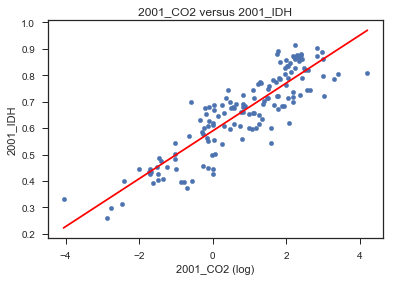

In [200]:
relacao_idh["2001_CO2"] = np.log(relacao_idh["2001_CO2"])
a,b = dispersao_com_reta(relacao_idh, variavel_x="2001_CO2", variavel_y="2001_IDH")

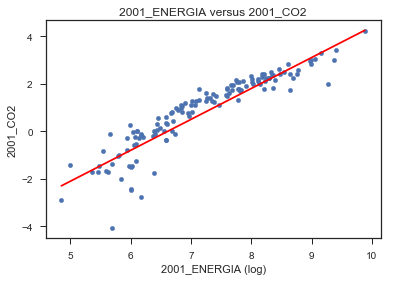

In [201]:
a,b = dispersao_com_reta(relacao_idh, variavel_x="2001_ENERGIA", variavel_y="2001_CO2")

Verificando dados de 2001

In [202]:
descricao_2001 = relacao_idh.describe()

### Analise:

Analisando os resultados, percebemos uma alta relação entre as 3 variáveis, podendo ser demonstrada pelo alto índice de correlação entre elas (mín: 0.54, máx:0.93). Com excessão

## 2010

Travando as variáveis na coluna e linhas desejadas // Comandos: ``loc``

In [203]:
energia_loc_2010 = energia.loc[:, ['2010']]
co2_loc_2010 = co2.loc[:, ['2010']]
idh_loc_2010 = idh.loc[:, ['2010']]

Juntando Colunas // Comandos: ``join``

In [204]:
join_1_2010 = idh_loc_2010.join(energia_loc_2010, how="inner", lsuffix="_IDH", rsuffix="_ENERGIA")
join_2_2010 = join_1_2010.join(co2_loc_2010, how="inner")

Renomeando Coluna 2010 (CO2) // Comandos: ``rename``

In [205]:
relacao_idh = join_2_2010.rename(columns={'2010': '2010_CO2'})
relacao_idh

,2010_IDH,2010_ENERGIA,2010_CO2
Países,,,
Albania,0.738,729.0,1.560
Algeria,0.724,1110.0,3.300
Angola,0.495,521.0,1.240
Antigua and Barbuda,0.782,NaN,5.540
Argentina,0.816,1910.0,4.560
Armenia,0.729,863.0,1.470
Australia,0.927,5790.0,17.700
Austria,0.880,4050.0,8.030
Azerbaijan,0.741,1280.0,3.400


Analisando a correlação entre as 3 variáveis // Comandos: ``loc; corr``

In [206]:
relacao_idh.loc[:,["2010_CO2", "2010_IDH"]].corr()

,2010_CO2,2010_IDH
2010_CO2,1.000000,0.574686
2010_IDH,0.574686,1.000000


In [207]:
relacao_idh.loc[:,["2010_ENERGIA", "2010_IDH"]].corr()

,2010_ENERGIA,2010_IDH
2010_ENERGIA,1.000000,0.575606
2010_IDH,0.575606,1.000000


In [208]:
relacao_idh.loc[:,["2010_ENERGIA", "2010_CO2"]].corr()

,2010_ENERGIA,2010_CO2
2010_ENERGIA,1.00000,0.88463
2010_CO2,0.88463,1.00000


Utilizando Função para fazer gráfico de dispersão, coeficientes da reta de ajuste, reta de ajuste, coeficientes de ajuste

In [209]:
def dispersao_com_reta(dados, variavel_x, variavel_y):
    dados_X = dados[variavel_x]
    dados_Y = dados[variavel_y]
    
    # Calcula os coeficientes da reta de ajuste.
    cov = dados_X.cov(dados_Y)

    var_X = dados_X.var()
    var_Y = dados_Y.var()

    mX = dados_X.mean()
    mY = dados_Y.mean()
    
    a = cov / var_X
    b = mY - a*mX

    # Desenha o gráfico de dispersão e a reta de ajuste.
    min_X = dados_X.min()
    max_X = dados_X.max()

#     plt.scatter(dados_X, dados_Y)  # dados.plot.scatter(x=variavel_X, y=variavel_Y) tambem serve!
    dados.plot.scatter(x=variavel_x, y=variavel_y)
    plt.plot((min_X, max_X), (a*min_X + b, a*max_X + b), color='red')

    plt.title('{0} versus {1}'.format(variavel_x, variavel_y))
    plt.xlabel('{0} (log)' .format(variavel_x))
    plt.ylabel(variavel_y)
    
    # Retorna os coeficientes de ajuste da reta.
    return a, b

Analisando Gráficamente as 3 variáveis

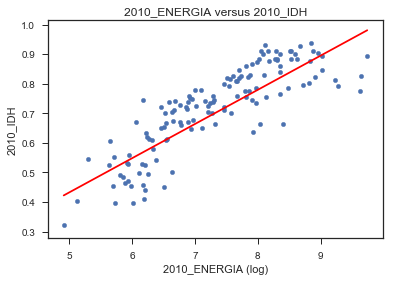

In [210]:
relacao_idh["2010_ENERGIA"] = np.log(relacao_idh["2010_ENERGIA"])
a,b = dispersao_com_reta(relacao_idh, variavel_x="2010_ENERGIA", variavel_y="2010_IDH")

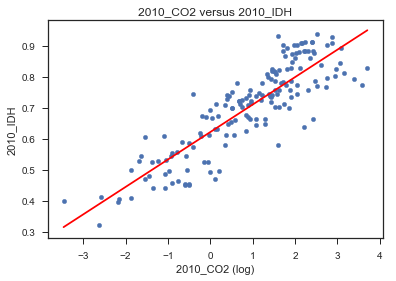

In [211]:
relacao_idh["2010_CO2"] = np.log(relacao_idh["2010_CO2"])
a,b = dispersao_com_reta(relacao_idh, variavel_x="2010_CO2", variavel_y="2010_IDH")

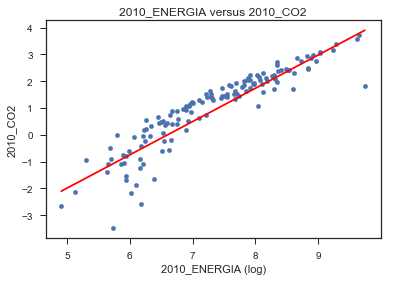

In [212]:
a,b = dispersao_com_reta(relacao_idh, variavel_x="2010_ENERGIA", variavel_y="2010_CO2")

Verificando mudanças na média nos 2 anos // Comandos: ``describe``

In [216]:
descricao_2010 = relacao_idh.describe()

In [215]:
descricao_2001

,2001_IDH,2001_ENERGIA,2001_CO2
count,150.000000,135.000000,165.000000
mean,0.658420,7.202244,0.761447
std,0.153758,1.087557,1.498360
min,0.261000,4.852030,-4.057049
25%,0.558750,6.291960,-0.180324
50%,0.680000,7.130899,1.068153
75%,0.779750,8.112218,1.974081
max,0.916000,9.883285,4.206184


In [217]:
descricao_2010

,2010_IDH,2010_ENERGIA,2010_CO2
count,167.000000,136.000000,166.000000
mean,0.700078,7.313953,0.882627
std,0.144600,1.060007,1.409707
min,0.323000,4.912655,-3.464137
25%,0.608500,6.492892,-0.022285
50%,0.724000,7.293018,1.113014
75%,0.809000,8.107707,1.901353
max,0.939000,9.740969,3.706228


### Analise:

Analisando os novos resultados, percebemos que o comportamento do IDH, Energia e CO2 se mantiveram similares ao longo dos 9 anos que se passaram, indicando que elas tendam a variar mais ao longo prazo.

# Conclusão

Com base nos estudos feitos anteriormente, é possível se concluir que ``SIM``, é verdade que quanto mais desenvolvido for um país, maior será o seu consumo de energia e emissão de co2 por pessoa, provado pelas fortes taxas de correlação entre energia, co2 e idh . Além disso pode se especular que o aumento do IDH poderia aumentar as taxas de co2 e energia, por terem crescido junto a ele nos últimos anos.